In [20]:
import os
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from matplotlib import rcParams

First we need to get a rough idea of effective population sizes to use for Beagle. We can try to get a rough idea using PSMC:

In [4]:
%%bash
source ~/.bashrc
conda activate ipyrad
cat /storage/group/ibb3/default/AP_AC_genome_seqs/dovetail_Apalm/HiC_improvement/Apalm_assembly_v3.0_200415.repeats.bed \
    | sed "s/^/Apal_/g" > ../references/repeats.bed
    
bedtools subtract \
    -a ../references/apal_10kb_windowed.bed \
    -b ../references/repeats.bed \
    > ../references/apal_repeatmasked.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [4]:
metadata = pd.read_csv("../filtered_DARPA_metadata.csv")
platemap = pd.read_csv("../huck_sub_id.csv")
metadata = platemap.merge(metadata, how = "left", on = "Huck_Sub_ID")
metadata["Novogene_ID"] = "A" + metadata["Database ID"].astype(str)

In [142]:
for i in metadata["Novogene_ID"].tolist():
    task = "psmc"
    mem = "32"
    cpus = "2"
    sample = i
    inpath = "/storage/home/nsl5160/scratch/darpa/mapped/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         inpath + " " + " " + sample], shell=True)

Submitted batch job 5032012
Submitted batch job 5032013
Submitted batch job 5032014
Submitted batch job 5032015
Submitted batch job 5032016
Submitted batch job 5032017
Submitted batch job 5032018
Submitted batch job 5032019
Submitted batch job 5032020
Submitted batch job 5032021
Submitted batch job 5032022
Submitted batch job 5032023
Submitted batch job 5032024
Submitted batch job 5032025
Submitted batch job 5032026
Submitted batch job 5032027
Submitted batch job 5032028
Submitted batch job 5032029
Submitted batch job 5032030
Submitted batch job 5032031
Submitted batch job 5032032
Submitted batch job 5032033
Submitted batch job 5032034
Submitted batch job 5032035
Submitted batch job 5032036
Submitted batch job 5032037
Submitted batch job 5032038
Submitted batch job 5032039
Submitted batch job 5032040
Submitted batch job 5032041
Submitted batch job 5032042
Submitted batch job 5032043
Submitted batch job 5032044
Submitted batch job 5032045
Submitted batch job 5032046
Submitted batch job 

In [21]:
for i in ["A13414"]:
    task = "psmc"
    mem = "32"
    cpus = "2"
    sample = i
    inpath = "/storage/home/nsl5160/scratch/darpa/mapped/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         inpath + " " + " " + sample], shell=True)

Submitted batch job 6526069


In [25]:
%%bash
source ~/.bashrc
conda activate psmc
cd ../psmc
for gen in 5; do
    for mut in 2.9e-08; do
        for i in $( find *_masked_diploid.psmc -type f -size +119k | cut -d"_" -f1 ); do
            psmc_plot.pl -u ${mut} -g ${gen} -x 0 -R ${i}_${mut}_${gen}_masked ${i}_masked_diploid.psmc
        done
    done
done

In [26]:
for mut in ["2.9e-08"]:
    for gen in ["5"]:
        files = glob.glob("../psmc/*_" + mut + "_" + gen + "_masked.0.txt")
        psmc_in = pd.DataFrame(columns = [0, 1, 2, 3, 4, 'IND'])
        for i in files:
            tmp = pd.read_csv(i, sep = "\t", header = None)
            tmp["IND"] = i.split("/")[2].split("_")[0]
            psmc_in = pd.concat([psmc_in, tmp]).reset_index(drop=True)

In [27]:
psmc_in

,0,1,2,3,4,IND
0,0.000000,0.233188,246.960692,0.005165,0.000246,A13414
1,120.872112,0.233188,267.858990,0.005602,0.001943,A13414
2,252.696172,0.233188,290.383560,0.006073,0.002917,A13414
3,396.447172,0.233188,314.634246,0.006580,0.003214,A13414
4,553.206948,0.109677,721.420434,0.015087,0.008158,A13414
...,...,...,...,...,...,...
5447,122241.525466,0.250204,68.970384,0.001704,0.001545,A22249
5448,133503.476043,0.209739,53.839439,0.001330,0.001200,A22249
5449,145792.830647,0.209739,31.951969,0.000789,0.000714,A22249
5450,159203.311345,0.209739,17.942309,0.000443,0.000399,A22249


/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2664850/819545265.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())


(0.0, 0.4178987826206892)

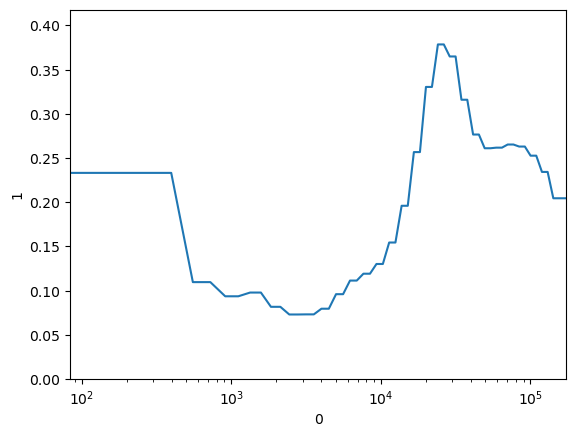

In [28]:
g = sns.lineplot(data = psmc_in[psmc_in["IND"] == "A13414"], x = 0, y = 1)
g.set(xscale="log")
plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())
plt.ylim(0,tmp[1][tmp[0] > tmp[0][16]].max() * 1.2)

/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2664850/819545265.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())


(0.0, 0.4178987826206892)

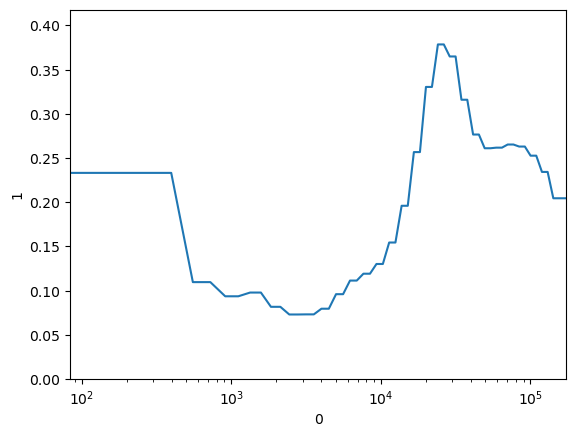

In [24]:
g = sns.lineplot(data = psmc_in[psmc_in["IND"] == "A13414"], x = 0, y = 1)
g.set(xscale="log")
plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())
plt.ylim(0,tmp[1][tmp[0] > tmp[0][16]].max() * 1.2)

/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2151912/3696699542.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())
/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2151912/3696699542.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())
/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_215

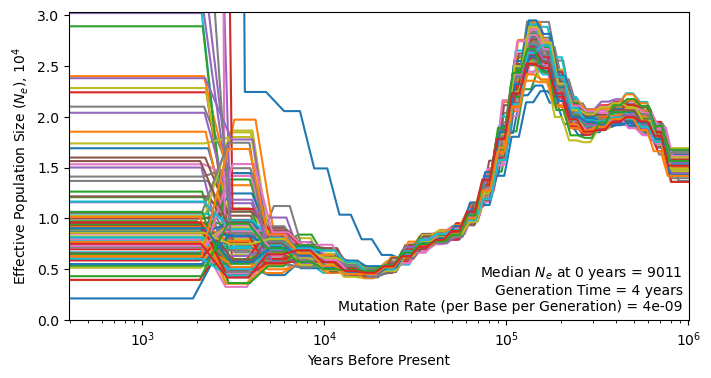

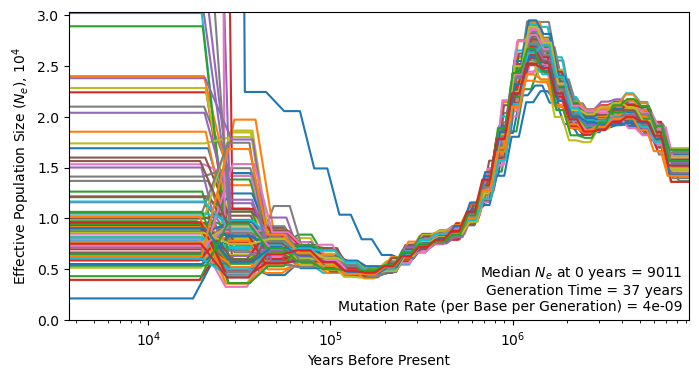

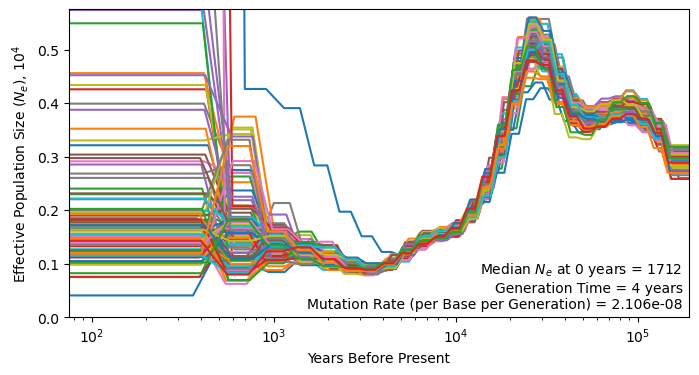

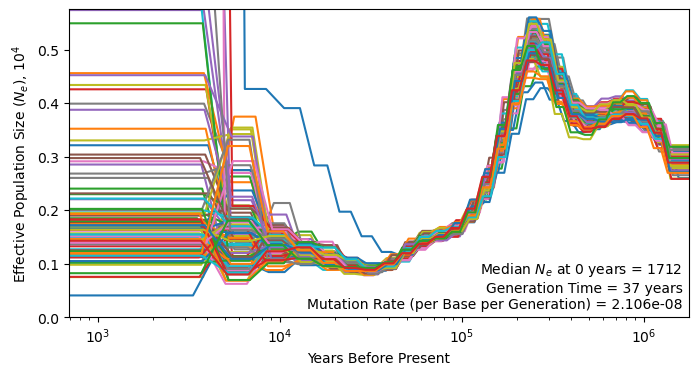

In [14]:
for mut in ["4e-09", "2.106e-08"]:
    for gen in ["4", "37"]:
        files = glob.glob("../psmc/*_" + mut + "_" + gen + "_masked.0.txt")
        psmc_in = pd.DataFrame(columns = [0, 1, 2, 3, 4, 'IND'])
        for i in files:
            tmp = pd.read_csv(i, sep = "\t", header = None)
            tmp["IND"] = i.split("/")[2].split("_")[0]
            psmc_in = pd.concat([psmc_in, tmp]).reset_index(drop=True)
        rcParams['figure.figsize'] = 8,4
        plt.figure()
        g = sns.lineplot(data = psmc_in, x = 0, y = 1, hue = "IND", 
                         legend = False, palette="tab10")
        g.set(xscale="log")
        plt.xlim(np.exp(np.log(tmp[0])[0]),tmp[0].max())
        plt.ylim(0,tmp[1][tmp[0] > tmp[0][16]].max() * 1.2)
        plt.xlabel("Years Before Present")
        plt.ylabel("Effective Population Size ($N_{e}$), $10^4$")
        plt.text(0.99, 0.02, 
                 'Median $N_{e}$ at 0 years = ' + str(round(psmc_in[1][psmc_in[0] == 0].median() * 10000)) + 
                 '\nGeneration Time = ' + gen + " years" + 
                 '\nMutation Rate (per Base per Generation) = ' + mut, 
                 fontsize=10, ha='right', va='bottom',
                 transform=plt.gca().transAxes);
        plt.savefig("../psmc_plot_" + mut + "_" + gen + ".pdf", dpi = 300)
        plt.savefig("../psmc_plot_" + mut + "_" + gen + ".png", dpi = 300)

For imputation we'll make sure to use a genetic map since corals have very high recombination rates. Kate Stankiewicz has generated a linkage map which is in preparation that we will use for this. There are some large disparities in recombination between sperm and egg so we'll use the average between the two. There also needs to be some formatting we do to get it ready for use with beagle:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

In [3]:
snps = pd.read_csv("../../convert_snpchip_coords/lepwrap_apal/snps.txt", sep = "\t")
snps = snps.reset_index(drop=False)
snps.columns = ["Marker", "CHR", "POS"]
snps["Marker"] = snps["Marker"] + 1

In [2]:
homologouschr = {"hic_scaffold_4":"LG1", "hic_scaffold_2":"LG2", "hic_scaffold_10":"LG3", 
                 "hic_scaffold_15":"LG4", "hic_scaffold_17":"LG5", "hic_scaffold_20":"LG6", 
                 "hic_scaffold_31":"LG7", "hic_scaffold_30":"LG8", "hic_scaffold_6":"LG9", 
                 "hic_scaffold_35":"LG10", "hic_scaffold_5":"LG11", "hic_scaffold_11":"LG12", 
                 "hic_scaffold_21":"LG13", "hic_scaffold_1":"LG14"}

In [4]:
snps = snps[snps["CHR"].isin(list(homologouschr.keys()))]

In [39]:
def lowess_smooth_link(df, sextype):
    start = 0.01
    smoothed = pd.DataFrame(sm.nonparametric.lowess(exog=df["phys"], endog=df[sextype], frac = start))
    smoothed.columns = ["phys", sextype]
    while start < 1:
        if ( smoothed["phys"].is_monotonic or 
        smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or 
                                                  smoothed[sextype].iloc[::-1].is_monotonic ):
            break
        else:
            start = start + 0.01
            smoothed = pd.DataFrame(sm.nonparametric.lowess(exog=df["phys"], endog=df[sextype], frac = start))
            smoothed.columns = ["phys", sextype]
    smoothed = smoothed.sort_values("phys").reset_index(drop=True)
    smoothed.loc[smoothed[sextype] < 0, sextype] = 0
    df["smoothed_" + sextype] = smoothed[sextype]
    df["lowess_smoothing_fraction_" + sextype] = start
    df = df.sort_values("phys").reset_index(drop=True)

In [128]:
linkagemap = pd.DataFrame()
for chrs in list(homologouschr.keys()):
    for sex in ["SEXAVG"]:
        tmp = pd.read_csv("../../acer_cnat_dcyl_ssid_assembly/recAllRatesLoess_Acroporapalmata_" + sex + "_2023-12-14.txt", sep = " ")
        tmp = tmp[tmp["vld"] == True]
        tmp = tmp[tmp["map"] == chrs].reset_index(drop=True)
        if tmp['gen'][0] > tmp['gen'][len(tmp) - 1]:
            tmp["gen"] = abs(tmp["gen"] - tmp["gen"].max())
        lowess_smooth_link(tmp, "gen")
        tmp["chr"] = "Apal_" + tmp["map"]
        tmp["chr"] = "Apal_" + tmp["map"]
        tmp["blank"] = "."
        tmp = tmp[["chr", "blank", "smoothed_gen", "phys"]]
    linkagemap = pd.concat([linkagemap, tmp]).reset_index(drop=True)

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future v

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed["phys"].iloc[::-1].is_monotonic ) and ( smoothed[sextype].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:8: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  smoothed[sextype].iloc[::-1].is_monotonic ):
/tmp/ipykernel_780969/3517873880.py:6: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if ( smoothed["phys"].is_monotonic or
/tmp/ipykernel_780969/3517873880.py:7: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing in

In [129]:
bed = pd.read_csv("../references/apal_and_sym.bed", sep = "\t", header = None, names = ["CHR", "start", "end"])
bed["start"] = bed["start"] + 1
bed["end"] = bed["end"] + 1
bed = bed[bed["CHR"].str.contains("Apal_")]
bed = bed.reset_index(drop=False)

In [130]:
recomb = []
for i in linkagemap["chr"].unique():
    tmp = linkagemap[linkagemap["chr"] == i]
    recomb = recomb + [tmp["smoothed_gen"][tmp.index[-1]] / (bed["end"][bed["CHR"] == i].reset_index(drop=True)[0] / 1000000)]

In [131]:
missing_data = pd.DataFrame()
for i in list(range(len(bed))):
    if bed["CHR"][i] not in linkagemap["chr"].unique():
        gen_pos = ((bed["end"][i] - bed["start"][i]) / 1000000) * np.mean(recomb)
        tmp = pd.DataFrame([[bed["CHR"][i], ".", np.nan, "1", 0, np.nan], 
                      [bed["CHR"][i], ".", np.nan, bed["end"][i], gen_pos, np.nan]], 
                     columns = ['CHR', 'blank', 'average', 
                              'POS', 'smoothed', 'lowess_smoothing_fraction'])
        missing_data = pd.concat([missing_data, tmp])
    else:
        pass
missing_data = missing_data[["CHR", "blank", "POS", "smoothed"]]
missing_data.columns = ["chr", "blank", "phys", "smoothed_gen"]
missing_data = missing_data[["chr", "blank", "smoothed_gen", "phys"]]

In [133]:
linkagemap = pd.concat([linkagemap, missing_data]).reset_index(drop=True)

In [136]:
(linkagemap[['chr', 'blank', 'smoothed_gen', 'phys']]
 .set_index("chr").to_csv("../Apal_linkage_map.txt", header = None, sep = " "))

GLIMPSE2 needs a specific linkage map format that is different than Beagle's requirements, so we generate that here. We make both a map of all regions as well as a map that is split by region in case we need to do any chunking:

In [1]:
!mkdir -p ../maps

In [139]:
%%bash
for i in $( cut -d" " -f1 ../Apal_linkage_map.txt | sort | uniq ); do
    echo -e "pos\tchr\tcM" > ../maps/${i}.gmap
    cat ../Apal_linkage_map.txt | grep "${i} " \
        | tr [:blank:] \\t | awk '{ print $4 "\t" $1 "\t" $3}' \
        >> ../maps/${i}.gmap
done

In [140]:
%%bash
echo -e "pos\tchr\tcM" > ../Apal_linkage.gmap
for i in $( cut -d" " -f1 ../Apal_linkage_map.txt | sort | uniq ); do
    cat ../Apal_linkage_map.txt | grep "${i} " \
        | tr [:blank:] \\t | awk '{ print $4 "\t" $1 "\t" $3}' \
        >> ../Apal_linkage.gmap
done